# stacked plots

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

Autosave disabled


In [2]:
from etl import DATADIR, ErgastF1
from viz import Plot

## Total Competition
What % of points went to each team on each year?

### load data downloaded from [ergast.com/mrd](ergast.com/mrd)

In [3]:
f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

### join, filter, and sort tables

In [4]:
points = (
    f1.team_results
    .loc[lambda df: df['points'] > 0]
    .set_index('id_race').join(f1.races[['date', 'race']])
    .loc[lambda df: df['date'] > '1989']
    .set_index('id_team').join(f1.teams['team'])
    .sort_values(['date','team']).sort_index(axis=1)
    .reset_index(drop=True)
)
points.tail()

,date,dsq,points,race,team
3074,2019-12-01,False,5.0,Abu Dhabi Grand Prix,McLaren
3075,2019-12-01,False,38.0,Abu Dhabi Grand Prix,Mercedes
3076,2019-12-01,False,6.0,Abu Dhabi Grand Prix,Racing Point
3077,2019-12-01,False,26.0,Abu Dhabi Grand Prix,Red Bull
3078,2019-12-01,False,2.0,Abu Dhabi Grand Prix,Toro Rosso


### count points for each (year, team)

In [5]:
data = (
    points
    .groupby([points['date'].dt.year, 'team'])
    ['points'].sum().unstack(fill_value=0)
)
data = 100 * data.div(data.sum(axis=1), axis=0)
data.tail()

team,AGS,Alfa Romeo,Arrows,BAR,BMW Sauber,Benetton,Brabham,Brawn,Dallara,Ferrari,...,Rial,Sauber,Spyker,Stewart,Super Aguri,Team Lotus,Toro Rosso,Toyota,Tyrrell,Williams
date,,,,,,,,,,,,,,,,,,,,,
2015,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.303283,...,0.0,1.875977,0.0,0.0,0.0,0.0,3.491402,0.0,0.0,13.392392
2016,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.764734,...,0.0,0.094295,0.0,0.0,0.0,0.0,2.970297,0.0,0.0,6.506365
2017,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.841584,...,0.0,0.247525,0.0,0.0,0.0,0.0,2.623762,0.0,0.0,4.108911
2018,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.921264,...,0.0,2.263083,0.0,0.0,0.0,0.0,1.555870,0.0,0.0,0.330033
2019,0.0,2.663551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.551402,...,0.0,0.000000,0.0,0.0,0.0,0.0,3.971963,0.0,0.0,0.046729


### focus on top-scoring teams
42 teams would clutter the plot.

In [6]:
top12 = data.max().nlargest(12).index
print(*top12, sep="\n")

Ferrari
Williams
McLaren
Mercedes
Red Bull
Benetton
Renault
Brawn
BMW Sauber
BAR
Lotus F1
Jordan


### coordinate colors

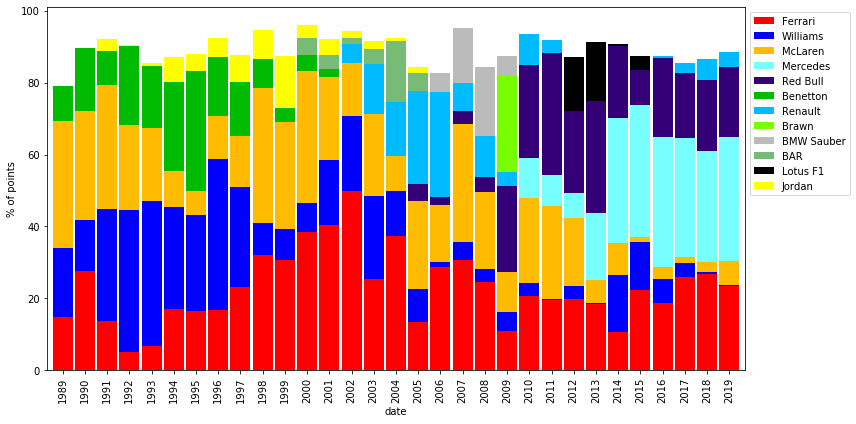

In [7]:
from collections import defaultdict

color = {
    'BAR': '#77bb77',
    'Benetton': '#00bb00',
    'BMW Sauber': '#bbbbbb',
    'Brawn': '#77ff00',
    'Ferrari': "#ff0000",
    'McLaren': "#ffbb00",
    'Mercedes': '#77ffff',
    'Red Bull': '#330077',
    'Renault': '#00bbff',
    'Williams': '#0000ff',
    'Jordan': '#ffff00'
}
color = defaultdict(lambda: "#000000", color)
plot.bar(data[top12], color=top12.map(color), ylabel="% of points")

### historical notes

- In 1990, McLaren-Honda lost champ Prost, but won the drivers' and constructors championship with Senna.
- Williams dominated much of the 1990's with Mansell, Prost, Hill, and Villeneuve, then fell away somewhat.
- In 1993, McLaren suffered when Honda withdrew after powering every 1986-1991 constructors' champion.
- In 1994, new safety rules were hastily introduced after the shocking deaths of Senna and Ratzenberger.
- McLaren began a comeback with Häkkinen in 1993, Mercedes engines in 1995, and designer Adrian Newey in 1997.
- In 1996, The Michael moved from Benetton to Ferrari. Ross Brawn and several Benetton engineers joined him later.
- Between The Michael and Barrichello, Ferrari scored half of all points in 2002.
- Renault did well with Alonso driving from 2003 through 2006, including the "one tire year" of 2005.
- In 2007, the close McLaren battle between champ Alonso and rookie Hamilton was won by Räikkonen in a Ferrari.
- McLaren scored the most points in 2007 but were disqualified due to "Spygate."
- Ferrari had the most points in 2008 despite narrowly losing the drivers' championship to Hamilton.
- Brawn dominated early '09, the first "double diffuser" year, then became Mercedes.
- Red Bull hired Newey in 2006 and Vettel (to their "b-team" Toro Rosso) in 2007.
- Vettel and Red Bull won all drivers' and constructors' championships from 2010 through 2013.
- Mercedes won every constructor's championship since the "turbo hybrid era" began in 2014.
- Hamilton won every drivers' championship of the "turbo hybrid era" except Rosberg's 2016 victory.

## take a closer look

In [8]:
oneyear = (
    points.set_index('date').loc['2004']
    .loc[lambda df: df['points'] > 0]
    .sort_values('date')
    .groupby(['race', 'team'], sort=False)
    ['points'].sum().unstack(fill_value=0)
)
oneyear.head()

team,BAR,Ferrari,McLaren,Renault,Williams,Sauber,Jaguar,Jordan,Toyota,Minardi
race,,,,,,,,,,
Australian Grand Prix,3.0,18.0,1.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0
Malaysian Grand Prix,6.0,15.0,3.0,6.0,8.0,1.0,0.0,0.0,0.0,0.0
Bahrain Grand Prix,10.0,18.0,0.0,8.0,2.0,0.0,1.0,0.0,0.0,0.0
San Marino Grand Prix,8.0,13.0,1.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0
Spanish Grand Prix,5.0,18.0,0.0,11.0,3.0,2.0,0.0,0.0,0.0,0.0


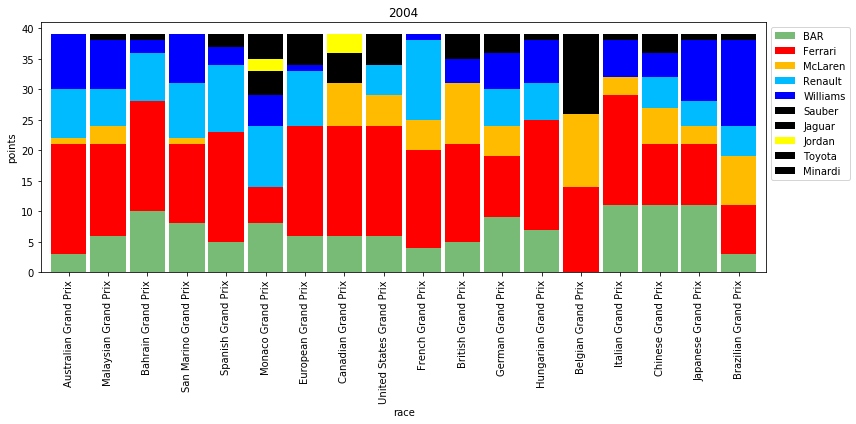

In [9]:
plot.bar(oneyear, color=oneyear.columns.map(color), title='2004', ylabel='points')